In [39]:
import pandas as pd

# 데이터 읽어오기
CH4 = pd.read_csv('data/ch4.csv')
CH4.head()

,Entity,Code,Year,Total including LUCF
0,Afghanistan,AFG,1990,6.740000e+06
1,Afghanistan,AFG,1991,7.020000e+06
2,Afghanistan,AFG,1992,7.130000e+06
3,Afghanistan,AFG,1993,7.210000e+06
4,Afghanistan,AFG,1994,7.470000e+06


In [40]:
# 필요한 데이터만 받기
CH4 = CH4.loc[CH4['Entity'] == 'World', ['Year', 'Total including LUCF']]
CH4.head()

,Year,Total including LUCF
6030,1990,6.909030e+09
6031,1991,6.918610e+09
6032,1992,6.895230e+09
6033,1993,6.914180e+09
6034,1994,6.958840e+09


In [50]:
# 데이터 리네임
CH4.rename(columns = {'Total including LUCF' : 'CH4'}, inplace=True)
# index reset
CH4.reset_index(drop=True, inplace=True)


<Figure size 7000x500 with 0 Axes>

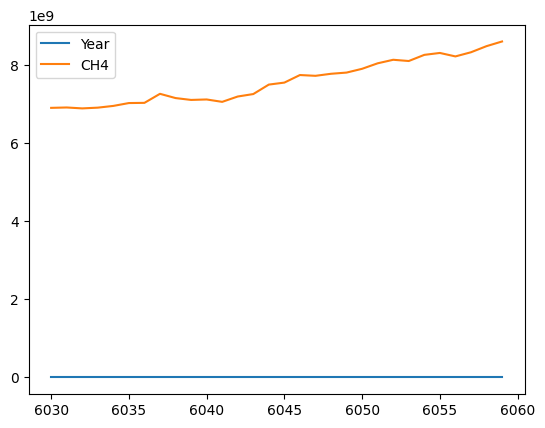

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(70,5))
CH4.plot()
plt.show()

In [51]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

x = CH4[['Year']]
y = CH4['CH4'].values



In [52]:
print(x, y)

      Year
0   1990.0
1   1991.0
2   1992.0
3   1993.0
4   1994.0
5   1995.0
6   1996.0
7   1997.0
8   1998.0
9   1999.0
10  2000.0
11  2001.0
12  2002.0
13  2003.0
14  2004.0
15  2005.0
16  2006.0
17  2007.0
18  2008.0
19  2009.0
20  2010.0
21  2011.0
22  2012.0
23  2013.0
24  2014.0
25  2015.0
26  2016.0
27  2017.0
28  2018.0
29  2019.0
30  2020.0
31  2021.0 [6.90902979e+09 6.91860986e+09 6.89522998e+09 6.91418018e+09
 6.95883984e+09 7.03208984e+09 7.03710986e+09 7.26860010e+09
 7.15987012e+09 7.11204004e+09 7.12400000e+09 7.06272021e+09
 7.19960010e+09 7.26250977e+09 7.50518018e+09 7.55627979e+09
 7.74995020e+09 7.72995996e+09 7.78222021e+09 7.81291016e+09
 7.90987988e+09 8.05043018e+09 8.14110986e+09 8.10929980e+09
 8.26680957e+09 8.31591016e+09 8.22717969e+09 8.33340039e+09
 8.48996973e+09 8.60991992e+09 8.53644029e+09 8.59804969e+09]


In [53]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

LinearRegression()

In [54]:
print('절편 :', lr.intercept_)
print('회귀 계수 :', lr.coef_)


절편 : -115914540437.90729
회귀 계수 : [61609396.39964559]


In [55]:
import numpy as np

# 전년도 까지 데이터 확보
# X_test = np.array([[2020], [2021]])

# 2050년 까지 데이터 확보
X_test = np.array([[i] for i in range(2022, 2051)])
result = list(lr.predict(X_test))
print(X_test)
print(result)

[[2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]
 [2050]]
[8659659082.176086, 8721268478.575745, 8782877874.975388, 8844487271.37503, 8906096667.774673, 8967706064.174316, 9029315460.573975, 9090924856.973618, 9152534253.37326, 9214143649.772903, 9275753046.172546, 9337362442.57219, 9398971838.971848, 9460581235.37149, 9522190631.771133, 9583800028.170776, 9645409424.57042, 9707018820.970062, 9768628217.36972, 9830237613.769363, 9891847010.169006, 9953456406.56865, 10015065802.968292, 10076675199.367935, 10138284595.767593, 10199893992.167236, 10261503388.56688, 10323112784.966522, 10384722181.366165]


In [56]:
for i in range(29):
    CH4.loc[len(CH4)] = [X_test[i][0], result[i]]
print(CH4)

      Year           CH4
0   1990.0  6.909030e+09
1   1991.0  6.918610e+09
2   1992.0  6.895230e+09
3   1993.0  6.914180e+09
4   1994.0  6.958840e+09
..     ...           ...
56  2046.0  1.013828e+10
57  2047.0  1.019989e+10
58  2048.0  1.026150e+10
59  2049.0  1.032311e+10
60  2050.0  1.038472e+10

[61 rows x 2 columns]


In [57]:
CH4.to_csv('CH4_2050.csv', index=False)